#1. Importing data and python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df=pd.read_csv('TravelInsurancePrediction.csv')

In [3]:
df.head()

Unnamed: 0  Age  ... EverTravelledAbroad TravelInsurance
0           0   31  ...                  No               0
1           1   31  ...                  No               0
2           2   34  ...                  No               1
3           3   28  ...                  No               0
4           4   28  ...                  No               0

[5 rows x 10 columns]

In [4]:
del df['Unnamed: 0']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [6]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [7]:
df.describe()

Age  AnnualIncome  ...  ChronicDiseases  TravelInsurance
count  1987.000000  1.987000e+03  ...      1987.000000      1987.000000
mean     29.650226  9.327630e+05  ...         0.277806         0.357323
std       2.913308  3.768557e+05  ...         0.448030         0.479332
min      25.000000  3.000000e+05  ...         0.000000         0.000000
25%      28.000000  6.000000e+05  ...         0.000000         0.000000
50%      29.000000  9.000000e+05  ...         0.000000         0.000000
75%      32.000000  1.250000e+06  ...         1.000000         1.000000
max      35.000000  1.800000e+06  ...         1.000000         1.000000

[8 rows x 5 columns]

In [8]:
#mapping categorical columns
df['GraduateOrNot']=df['GraduateOrNot'].map({'No':0, 'Yes':1})
df['FrequentFlyer']=df['FrequentFlyer'].map({'No':0, 'Yes':1})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'No':0, 'Yes':1})

In [9]:
df.head()

Age               Employment Type  ...  EverTravelledAbroad  TravelInsurance
0   31             Government Sector  ...                    0                0
1   31  Private Sector/Self Employed  ...                    0                0
2   34  Private Sector/Self Employed  ...                    0                1
3   28  Private Sector/Self Employed  ...                    0                0
4   28  Private Sector/Self Employed  ...                    0                0

[5 rows x 9 columns]

#2. Exploratory data analysis

2.1. Exploration of Age

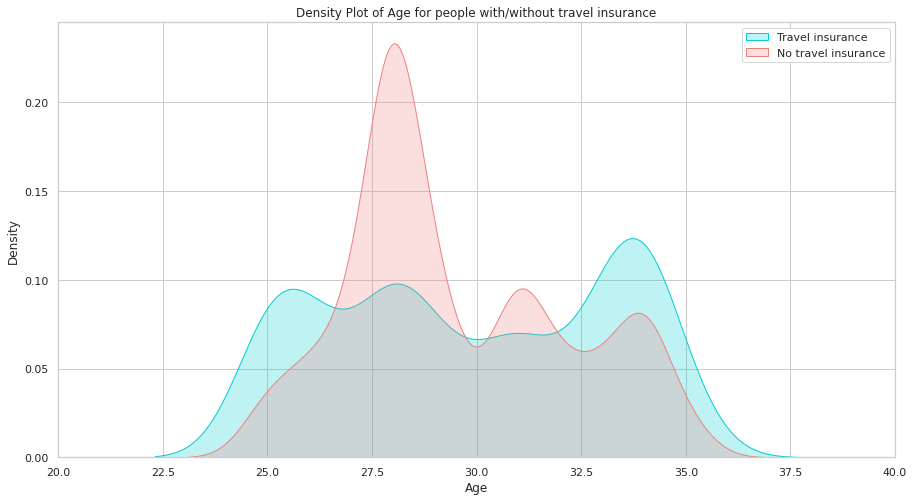

In [10]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Age"][df.TravelInsurance == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.TravelInsurance == 0], color="lightcoral", shade=True)
plt.legend(['Travel insurance', 'No travel insurance'])
plt.title('Density Plot of Age for people with/without travel insurance')
ax.set(xlabel='Age')
plt.xlim(20,40)
plt.show()

One notable difference is that people under 30 years old are less likely to buy travel insurance. 

2.2. Exploration of Employment Type

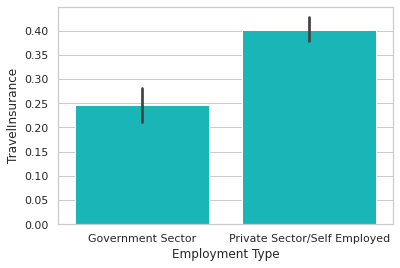

In [11]:
sns.barplot(x='Employment Type', y='TravelInsurance', data=df, color='darkturquoise')
plt.show()

People working in private sector/self employed tend to have travel insurance more often.

2.3. Exploration of 'GraduateOrNot'

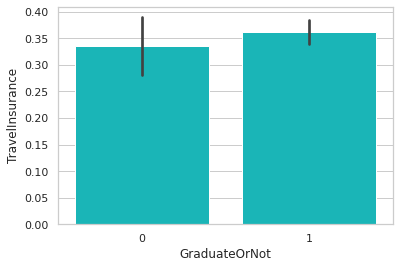

In [12]:
sns.barplot(x='GraduateOrNot', y='TravelInsurance', data=df, color='darkturquoise')
plt.show()

People who have graduated (1) are slightly more likely to buy travel insurance.

2.4. Exploration of Annual Income

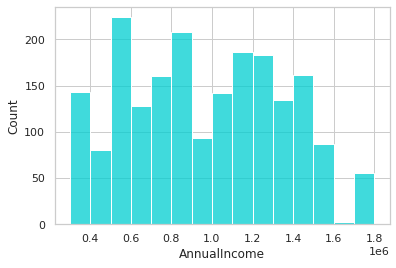

In [13]:
sns.histplot(x='AnnualIncome', data=df, color='darkturquoise')
plt.show()

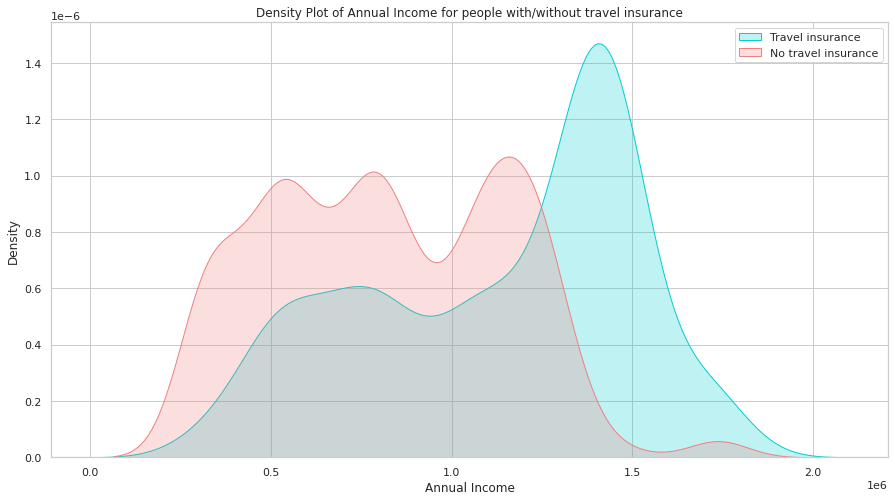

In [14]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["AnnualIncome"][df.TravelInsurance == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["AnnualIncome"][df.TravelInsurance == 0], color="lightcoral", shade=True)
plt.legend(['Travel insurance', 'No travel insurance'])
plt.title('Density Plot of Annual Income for people with/without travel insurance')
ax.set(xlabel='Annual Income')
plt.show()

The higher annual income, the more likely it is for a person to get travel insurance.

2.5. Exploration of Family Members

In [15]:
df['FamilyMembers'].unique()

array([6, 7, 4, 3, 8, 9, 5, 2])

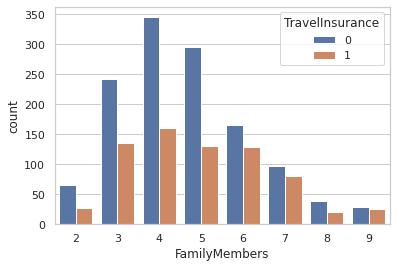

In [16]:
sns.countplot(x=df['FamilyMembers'],hue=df["TravelInsurance"])
plt.show()

2.6. Exporation of Chronic Diseases

In [17]:
sns.barplot(x='ChronicDiseases', y='TravelInsurance', data=df, color='darkturquoise')
plt.show()

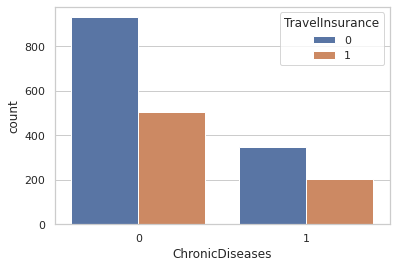

In [18]:
sns.countplot(x=df['ChronicDiseases'],hue=df["TravelInsurance"])
plt.show()

People with chronic diseases are less likely to travel/get travel insurance.

2.7. Exploration of 'FrequentFlyer'

In [19]:
sns.barplot(x='FrequentFlyer', y='TravelInsurance', data=df, color='darkturquoise')
plt.show()

In [20]:
sns.countplot(x=df['FrequentFlyer'],hue=df["TravelInsurance"])
plt.show()

2.8. Exploration of 'EverTravelledAbroad'

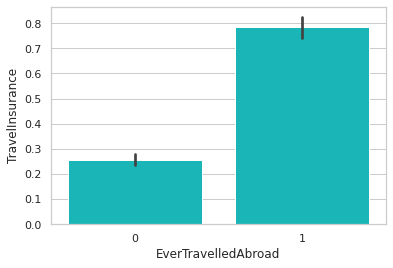

In [21]:
sns.barplot(x='EverTravelledAbroad', y='TravelInsurance', data=df, color='darkturquoise')
plt.show()

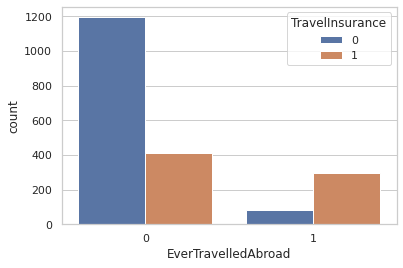

In [22]:
sns.countplot(x=df['EverTravelledAbroad'],hue=df["TravelInsurance"])
plt.show()

Unsurprisingly, people who travel less are less likely to get travel insurance.

2.9. Exploration of target variable

In [23]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

2.10. Heatmap

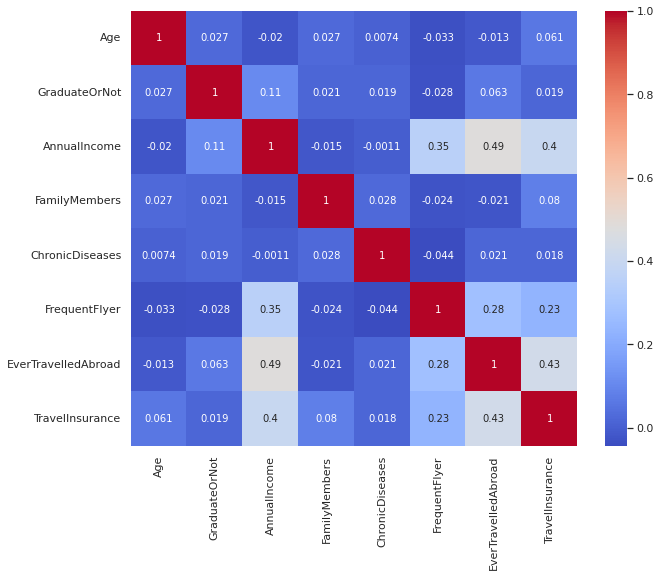

In [24]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()



#3. Building model

3.1. Assigning variables

In [25]:
y=df['TravelInsurance']
X=df.drop(['TravelInsurance'], axis=1)

In [26]:
X.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

In [31]:
X_cat=X[['Employment Type', 'GraduateOrNot','FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad']]
X_num=X[['Age', 'AnnualIncome']]

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#scaling data
scaler = StandardScaler()
numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())])

cat_transformer=OneHotEncoder(handle_unknown='ignore')
preprocessor=ColumnTransformer(transformers=[
      ('num', numeric_transformer, X_num.select_dtypes(exclude="object").columns),
      ('cat', cat_transformer, X_cat.select_dtypes(include="object").columns)
])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train_scaled=preprocessor.fit_transform(X_train)
X_test_scaled=preprocessor.transform(X_test)

3.2. SVC model

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC(kernel='rbf')
svc.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred=svc.predict(X_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [39]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1-Score: {f1}')

Accuracy: 0.7788944723618091
Precision: 0.8648648648648649
Recall: 0.4507042253521127
F1-Score: 0.5925925925925926


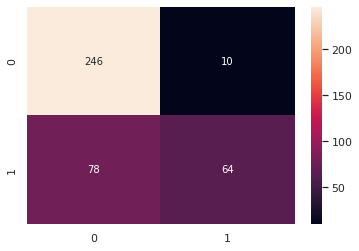

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

#4. Hyperparameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid={
    'C': np.arange(1e-05, 3, 0.1),
    'gamma': ['scale', 'auto']
}

In [44]:
grid=GridSearchCV(SVC(), param_grid=param_grid, cv=10, verbose=1)

In [46]:
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   37.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000e-05, 1.00010e-01, 2.000...
       1.00001e+00, 1.10001e+00, 1.20001e+00, 1.30001e+00, 1.40001e+00,
       1.50001e+00, 1.60001e+00, 1.70001e+00, 1.80001e+00, 1.90001e+00,
       2.00001e+00, 2.10001e+00, 2.20001e+00, 2.30001e+00, 2.40001e+00,
       2.50001e+00, 2.60001e+00, 2.70001e+00, 2.80001e+00, 2.90001e+00]),
                         'gamma': ['scale', 'auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ver

In [47]:
print('Best Parameters : ',grid.best_params_)
print('Best score Through Grid Search : %.3f'%grid.best_score_)

Best Parameters :  {'C': 0.40001000000000003, 'gamma': 'auto'}
Best score Through Grid Search : 0.780
